In [1]:
import numpy as np 
import pandas as pd

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12172\118197663.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
obj = pd.Series(["a", "b", "c", "d", "e", "f", "a", "c", "d", "b", "a"])
obj

0     a
1     b
2     c
3     d
4     e
5     f
6     a
7     c
8     d
9     b
10    a
dtype: object

In [3]:
# To return only unique values
obj.unique()

array(['a', 'b', 'c', 'd', 'e', 'f'], dtype=object)

In [4]:
#To rerun value frequence
obj.value_counts()

a    3
b    2
c    2
d    2
e    1
f    1
Name: count, dtype: int64

In [5]:
df_1 = pd.DataFrame({
    "key": ["b", "b", "a", "c", "a", "a", "b"],
    "data1": range(7)
})

df_2 = pd.DataFrame({
    "key": ["a", "b", "c"],
    "data2": range(3)
})
df_1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [6]:
df_2

,key,data2
0,a,0
1,b,1
2,c,2


In [7]:
pd.merge(df_1, df_2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,c,3,2
4,a,4,0
5,a,5,0
6,b,6,1


In [8]:
pd.merge(df_1, df_2, on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,c,3,2
4,a,4,0
5,a,5,0
6,b,6,1


In [9]:
import matplotlib.pyplot as plt
import numpy as np

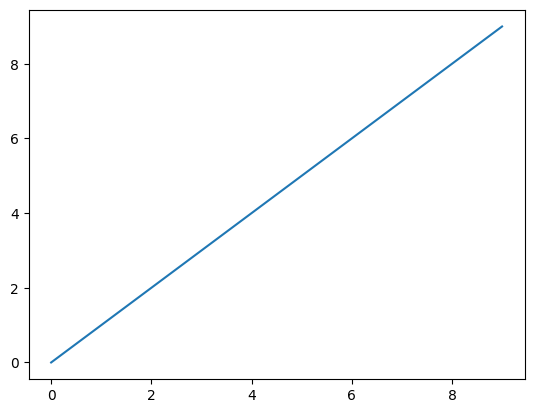

In [10]:
plt.plot(np.arange(10))

In [11]:
import pandas as pd
import numpy as np 

data = pd.Series(range(4,7), index=["a", "b", "c"])
data

a    4
b    5
c    6
dtype: int64

In [12]:
# Creating a new Index to the series object 
new_index = ["c", "b", "a"] 
data_2 = data.reindex(new_index, fill_value=0)
data_2

c    6
b    5
a    4
dtype: int64

In [13]:
df = pd.DataFrame(data, columns=["age"])
df.reindex(new_index)

,age
c,6
b,5
a,4


# Incase we introduce an element that was not in the previous index, 
# The series object will be filled NaN values. 
# We can replace this values using fill_value or ffill paraments of the reindex as indicated below 


In [14]:
# Replacing values with ffill and fill_value
df = pd.DataFrame(data, columns=["age"]) 
df_2 = df.reindex(["a", "c", "b", "f"], fill_value="0")
df_2

,age
a,4
c,6
b,5
f,0


In [15]:
df_2 = df.reindex(["a", "c", "b", "f"], fill_value="0")
df_2

,age
a,4
c,6
b,5
f,0


In [16]:
## We can also use forward fill ---> ffill
new_index = ["a", "c", "b", "f"]

df = pd.DataFrame(data, columns=["age"])
df_2 = df.reindex(new_index, method="ffill") 

df_2

,age
a,4
c,6
b,5
f,6


### Dropping entries from an axis
### We use drop()

In [17]:
data = pd.Series(np.arange(5), index=["a", "b", "c", "d", "f"])
data

a    0
b    1
c    2
d    3
f    4
dtype: int32

In [18]:
# We can drop index c as follows 
data_2 = data.drop("c")
data_2


a    0
b    1
d    3
f    4
dtype: int32

In [19]:
df = pd.DataFrame(
    np.arange(16).reshape(4,4),
    index=["Nyeri", "Embu", "Nakuru", "Nairobi"],
    columns=["population", "area", "num_rivers", "num_hills"]
)

df

,population,area,num_rivers,num_hills
Nyeri,0,1,2,3
Embu,4,5,6,7
Nakuru,8,9,10,11
Nairobi,12,13,14,15


In [20]:
# dropping index values 
df.drop("Nyeri")

,population,area,num_rivers,num_hills
Embu,4,5,6,7
Nakuru,8,9,10,11
Nairobi,12,13,14,15


In [21]:
# We can also drop using columns 
df.drop("population", axis=1)

,area,num_rivers,num_hills
Nyeri,1,2,3
Embu,5,6,7
Nakuru,9,10,11
Nairobi,13,14,15


### Indexing, Selection, and Filtering 
#### This will be done using DataFrame.ix[], DataFrame.loc[], or DataFrame.iloc[]

### DataFrame.ix[]
- This method is both label-based and integer-based. It is a hybrid method of selecting and filtering.

In [22]:
from os import name


df = pd.DataFrame(
    np.arange(16).reshape(4,4),
    columns = ["population", "area", "num_rivers", "num_hills"],
    index=["Nairobi", "Kisumu", "Mombasa", "Nakuru"]
) 
df

,population,area,num_rivers,num_hills
Nairobi,0,1,2,3
Kisumu,4,5,6,7
Mombasa,8,9,10,11
Nakuru,12,13,14,15


In [23]:
df.population

Nairobi     0
Kisumu      4
Mombasa     8
Nakuru     12
Name: population, dtype: int32

In [24]:
df.area 

Nairobi     1
Kisumu      5
Mombasa     9
Nakuru     13
Name: area, dtype: int32

In [25]:
df[2:]

,population,area,num_rivers,num_hills
Mombasa,8,9,10,11
Nakuru,12,13,14,15


#### Arithmetic and data alignment 
- we can perfom arithmetic behaviors between objects with different indexes

In [26]:
data1 = pd.Series(
    np.arange(5),
    index=["a", "b", "c", "d", "e"],
)

data2 = pd.Series(
    np.arange(5,15),
    index=["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]

)

In [27]:
# We can add these two series objects to get 
# Noting that the respective index will be the union of the index pairs
# For the indexes that do not overlap, internal data alignment will introduce NaN
data2 + data1

a     5.0
b     7.0
c     9.0
d    11.0
e    13.0
f     NaN
g     NaN
h     NaN
i     NaN
j     NaN
dtype: float64

In [28]:
# We can also add pandas DataFrames. 
# arithmentic operations will apply at the intersection of columns and index in each data frame 
df_1 = pd.DataFrame(
    np.arange(12).reshape(4,3),
    index=["Uta", "Ohio", "Texas", "Oregon"], 
    columns=list("bde")
) 

df_2 = pd.DataFrame(
    np.arange(9).reshape(3,3),
    index=["Ohio", "Texas", "Colorado"],
    columns=list("bcd")
)

df_2

,b,c,d
Ohio,0,1,2
Texas,3,4,5
Colorado,6,7,8


In [29]:
df_1

,b,d,e
Uta,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [30]:
# The resulting DataFrame will be the union of columns and indexes from the ones on each DataFrame
df_1 + df_2 

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Uta,NaN,NaN,NaN,NaN


In [31]:
# We can also use arithmetic methods that have arithmetic values
# This applies for arithmetic operations such as add, sub, mult, and div
df_1.add(df_2, fill_value=0) # This will replace all NaN values with 0

,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Uta,0.0,NaN,1.0,2.0


### Function Application Mapping 


In [32]:
np.random.randn(3,4)

array([[-1.04897979,  0.20876301,  0.0968271 ,  2.25432866],
       [ 0.33690518,  1.1199929 , -0.60408588,  1.3607536 ],
       [-1.57638177, -0.43185034, -0.14127162, -0.491249  ]])

In [33]:
df_1 

,b,d,e
Uta,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [34]:
func = lambda x: x + 10
df_1.apply(func)

,b,d,e
Uta,10,11,12
Ohio,13,14,15
Texas,16,17,18
Oregon,19,20,21


In [35]:
# We can also sort Series and DataFrame objects 
data = pd.DataFrame(
    np.random.randn(3,3),
    index=list("cba"),
    columns=list("321")
)
data

,3,2,1
c,-1.124438,-0.741760,1.309318
b,-1.434128,0.231547,0.829167
a,-1.014367,-0.830074,0.792443


In [36]:
# We can now try to sort the above pandas dataframe 
data.sort_index() # Will sort the rows
data.sort_index(axis=1) # Will sort the columns

,1,2,3
c,1.309318,-0.741760,-1.124438
b,0.829167,0.231547,-1.434128
a,0.792443,-0.830074,-1.014367


In [37]:
df = pd.DataFrame(
    np.random.randn(4,3),
    columns=list("321"),
    index=list("cbad")
)
df

,3,2,1
c,-1.135939,1.432587,0.892287
b,-0.934627,0.513525,-0.099020
a,-0.845240,0.394948,-0.422180
d,-1.520717,0.592934,-0.758058


In [38]:
# We can also sort by particular column or columns, for instance 
df.sort_values(by="2", ascending=False)

,3,2,1
c,-1.135939,1.432587,0.892287
d,-1.520717,0.592934,-0.758058
b,-0.934627,0.513525,-0.099020
a,-0.845240,0.394948,-0.422180


### Summarizing and Computing Descriptive Statistics 

In [39]:
df = pd.DataFrame(
    np.arange(12).reshape(4,3),
    columns=list("123"),
    index=list("abcd")
)
df

,1,2,3
a,0,1,2
b,3,4,5
c,6,7,8
d,9,10,11


In [40]:
# Now getting the sum()
# The result will be the sum of every column
df.sum()

1    18
2    22
3    26
dtype: int64

In [41]:
# Getting the sum() every row 
df.sum(axis=1)

a     3
b    12
c    21
d    30
dtype: int64

In [42]:
# NA values are always excluded. Unless the entire row or col is NA 
# Ignoring NA values can be disabled with skipna param

# Introducing NA values to our DataFrame 
df.iloc[3,1] = np.nan 
df

,1,2,3
a,0,1.0,2
b,3,4.0,5
c,6,7.0,8
d,9,NaN,11


In [43]:
# NaN values are ignored
df.sum()

1    18.0
2    12.0
3    26.0
dtype: float64

In [44]:
df.sum(axis=1)

a     3.0
b    12.0
c    21.0
d    20.0
dtype: float64

In [45]:
# Getting the mean 
df.mean(axis=1)

a     1.0
b     4.0
c     7.0
d    10.0
dtype: float64

In [46]:
df

,1,2,3
a,0,1.0,2
b,3,4.0,5
c,6,7.0,8
d,9,NaN,11


In [47]:
df.describe()

,1,2,3
count,4.000000,3.0,4.000000
mean,4.500000,4.0,6.500000
std,3.872983,3.0,3.872983
min,0.000000,1.0,2.000000
25%,2.250000,2.5,4.250000
50%,4.500000,4.0,6.500000
75%,6.750000,5.5,8.750000
max,9.000000,7.0,11.000000


In [48]:
df.count()

1    4
2    3
3    4
dtype: int64

### Handling Missing Data

- We can filter out the missing data using dropna()

In [49]:
df

,1,2,3
a,0,1.0,2
b,3,4.0,5
c,6,7.0,8
d,9,NaN,11


In [50]:
# Dropping all the rows that have missiong data
df.dropna()

,1,2,3
a,0,1.0,2
b,3,4.0,5
c,6,7.0,8


In [51]:
# Dropping all the cols that have missiong data 
df.dropna(axis=1)

,1,3
a,0,2
b,3,5
c,6,8
d,9,11


- Rather than filtering out the missing data and potentially discard other important data long, we can fill in the holes with some sort of value.
- We can achieve this using fillna()

In [52]:

df

,1,2,3
a,0,1.0,2
b,3,4.0,5
c,6,7.0,8
d,9,NaN,11


In [53]:
# filling out the missing data with 0
df.fillna(0)

,1,2,3
a,0,1.0,2
b,3,4.0,5
c,6,7.0,8
d,9,0.0,11


In [54]:
# We can also fill in the missing data using mean of the data 
df.fillna(df.mean())

,1,2,3
a,0,1.0,2
b,3,4.0,5
c,6,7.0,8
d,9,4.0,11


In [55]:
df.describe()

,1,2,3
count,4.000000,3.0,4.000000
mean,4.500000,4.0,6.500000
std,3.872983,3.0,3.872983
min,0.000000,1.0,2.000000
25%,2.250000,2.5,4.250000
50%,4.500000,4.0,6.500000
75%,6.750000,5.5,8.750000
max,9.000000,7.0,11.000000


### Understanding loc and iloc 
- They are the functions used to filter rows and columns based on labels


In [56]:
df

,1,2,3
a,0,1.0,2
b,3,4.0,5
c,6,7.0,8
d,9,NaN,11


In [57]:
data = pd.read_csv("titanic.csv")

In [58]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Using the pandas loc function to filter rows and columns based on thier labels

In [59]:
# Selecting row 0 along with all it columns 
data.loc[0,:]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [60]:
# Selecting the first three rowns together with thier columns 
data.loc[[0,1,2], :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [61]:
# Accessing the all the rows but only the the column labeled "Name"
data.loc[:, "Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [62]:
# Acessing all the rows and the columns labeld "Name", "Sex", "Age", and "Fare"
data.loc[:, ["Name", "Sex", "Age", "Fare"]]

,Name,Sex,Age,Fare
0,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,"Allen, Mr. William Henry",male,35.0,8.0500
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0,13.0000
887,"Graham, Miss. Margaret Edith",female,19.0,30.0000
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500
889,"Behr, Mr. Karl Howell",male,26.0,30.0000


In [63]:
# Filtering the Sex column and get a dataset only for male
data.loc[data.Sex=="male"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
# Getting the first 10 rows for only the male 
filtered = data.loc[data.Sex=="male"] # Data has been filtered to show onlly male
filtered.loc[0:10, ["Name", "Sex", "Ticket"]]

,Name,Sex,Ticket
0,"Braund, Mr. Owen Harris",male,A/5 21171
4,"Allen, Mr. William Henry",male,373450
5,"Moran, Mr. James",male,330877
6,"McCarthy, Mr. Timothy J",male,17463
7,"Palsson, Master. Gosta Leonard",male,349909


In [65]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
